# Aula dia 07/01/2025  

## Atividade com modelos RandomForest, DecisionTree, LogisticRegression


## Atividade com modelos RandomForestRegressor, DecisionTreeRegressor, LinearRegressor

### Breast Cancer

In [393]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Modelos da aula do dia 06/01/2025

In [394]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelos da aula do dia 07/01/2025

### --> Pesquisar sobre Naive Bayes <--

In [395]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

In [396]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt

In [398]:
breast_cancer = load_breast_cancer(as_frame = True)
df_breast = breast_cancer.frame

In [399]:
X_breast_cancer = df_breast.drop('target',axis = 1)
Y_breast_cancer = df_breast['target']

In [400]:
X_train_breast_cancer,X_test_breast_cancer,Y_train_breast_cancer,Y_test_breast_cancer = train_test_split(X_breast_cancer,Y_breast_cancer,test_size = 0.20, random_state = 0)

In [401]:
X_train_breast_cancer.shape, X_test_breast_cancer.shape, Y_train_breast_cancer.shape, Y_test_breast_cancer.shape

((455, 30), (114, 30), (455,), (114,))

# Modelos CL

In [402]:
modelos_cl = {
    "DecisionClassifierTree": DecisionTreeClassifier(random_state = 0),
    "RandomForest":RandomForestClassifier(random_state = 0),
    "LogisticRegression": LogisticRegression(random_state = 0)
}

# Modelo Random Forest 100/300/500


In [403]:
modelos_rf = {
    "RandomForest 100 ":RandomForestClassifier(n_estimators = 100,random_state = 0),
     "RandomForest 300 ":RandomForestClassifier(n_estimators = 300,random_state = 0),
     "RandomForest 500 ":RandomForestClassifier(n_estimators = 500,random_state = 0),
}

# Modelo LogisticRegression



In [404]:
logistic = LogisticRegression(solver = 'liblinear',random_state = 0)

# Modelos NB

In [405]:
modelos_nb = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "MultinomialNB": MultinomialNB()
}

# Modelos svm

In [406]:
modelos_svm = {
    "SVM (Linear)": SVC(kernel='linear',C=1.0,random_state=0),
    "SVM (RGF)": SVC(kernel='rbf', C=1.0, random_state=0),
    "SVM (Poly)": SVC(kernel='poly', C=1.0, random_state=0)
}

# Resultados

In [407]:
resultados = {
    'Modelo': [],
    'Acuracia': []
}

### NB

In [408]:
for nome_modelo, modelo in  modelos_nb.items():
    modelo.fit(X_train_breast_cancer, Y_train_breast_cancer)
    y_preds_breast_cancer = modelo.predict(X_test_breast_cancer)
    acc = accuracy_score(Y_test_breast_cancer, y_preds_breast_cancer)
    resultados['Modelo'].append(nome_modelo)
    resultados['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_test_breast_cancer, y_preds_breast_cancer, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_test_breast_cancer,y_preds_breast_cancer))
    print('-' * 80)


==== GaussianNB =====
Acurácia: 0.9298
Relatório de classificação
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Matriz de confusão
[[43  4]
 [ 4 63]]
--------------------------------------------------------------------------------

==== BernoulliNB =====
Acurácia: 0.5877
Relatório de classificação
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.59      1.00      0.74        67

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

Matriz de confusão
[[ 0 47]
 [ 0 67]]
------------------------------------------------------

### SVM

In [409]:
for nome_modelo, modelo in  modelos_svm.items():
    modelo.fit(X_train_breast_cancer, Y_train_breast_cancer)
    y_preds_breast_cancer = modelo.predict(X_test_breast_cancer)
    acc = accuracy_score(Y_test_breast_cancer, y_preds_breast_cancer)
    resultados['Modelo'].append(nome_modelo)
    resultados['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_test_breast_cancer, y_preds_breast_cancer, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_test_breast_cancer,y_preds_breast_cancer))
    print('-' * 80)


==== SVM (Linear) =====
Acurácia: 0.9561
Relatório de classificação
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Matriz de confusão
[[46  1]
 [ 4 63]]
--------------------------------------------------------------------------------

==== SVM (RGF) =====
Acurácia: 0.9298
Relatório de classificação
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Matriz de confusão
[[40  7]
 [ 1 66]]
------------------------------------------------------

# CL

In [410]:
for nome_modelo, modelo in  modelos_cl.items():
    modelo.fit(X_train_breast_cancer, Y_train_breast_cancer)
    y_preds_breast_cancer = modelo.predict(X_test_breast_cancer)
    acc = accuracy_score(Y_test_breast_cancer, y_preds_breast_cancer)
    resultados['Modelo'].append(nome_modelo)
    resultados['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_test_breast_cancer, y_preds_breast_cancer, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_test_breast_cancer,y_preds_breast_cancer))
    print('-' * 80)


==== DecisionClassifierTree =====
Acurácia: 0.9123
Relatório de classificação
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Matriz de confusão
[[44  3]
 [ 7 60]]
--------------------------------------------------------------------------------

==== RandomForest =====
Acurácia: 0.9649
Relatório de classificação
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Matriz de confusão
[[46  1]
 [ 3 64]]
-----------------------------------------

C:\Users\noturno\anaconda3\envs\turma2\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RandomForest variação com número de estimators

In [411]:
for nome_modelo, modelo in  modelos_rf.items():
    modelo.fit(X_train_breast_cancer, Y_train_breast_cancer)
    y_preds_breast_cancer = modelo.predict(X_test_breast_cancer)
    acc = accuracy_score(Y_test_breast_cancer, y_preds_breast_cancer)
    resultados['Modelo'].append(nome_modelo)
    resultados['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_test_breast_cancer, y_preds_breast_cancer, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_test_breast_cancer,y_preds_breast_cancer))
    print('-' * 80)


==== RandomForest 100  =====
Acurácia: 0.9649
Relatório de classificação
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Matriz de confusão
[[46  1]
 [ 3 64]]
--------------------------------------------------------------------------------

==== RandomForest 300  =====
Acurácia: 0.9825
Relatório de classificação
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Matriz de confusão
[[46  1]
 [ 1 66]]
-----------------------------------------

# Resultados 

In [412]:
df_resultados =  pd.DataFrame(resultados)

In [413]:
print('\n ============ Resumo dos resultados =========')
print(df_resultados)


 ============ Resumo dos resultados =========
                    Modelo  Acuracia
0               GaussianNB  0.929825
1              BernoulliNB  0.587719
2            MultinomialNB  0.894737
3             SVM (Linear)  0.956140
4                SVM (RGF)  0.929825
5               SVM (Poly)  0.912281
6   DecisionClassifierTree  0.912281
7             RandomForest  0.964912
8       LogisticRegression  0.947368
9        RandomForest 100   0.964912
10       RandomForest 300   0.982456
11       RandomForest 500   0.964912


### Somente acima de 90% de acurácia

In [414]:
df_resultados_ = df_resultados[df_resultados['Acuracia'] >= 0.90].copy()

In [415]:
df_resultados_.reset_index(drop = True, inplace = True)

In [416]:
df_resultados_

,Modelo,Acuracia
0,GaussianNB,0.929825
1,SVM (Linear),0.956140
2,SVM (RGF),0.929825
3,SVM (Poly),0.912281
4,DecisionClassifierTree,0.912281
5,RandomForest,0.964912
6,LogisticRegression,0.947368
7,RandomForest 100,0.964912
8,RandomForest 300,0.982456
9,RandomForest 500,0.964912


# Geração de gráfico modelos de classificação

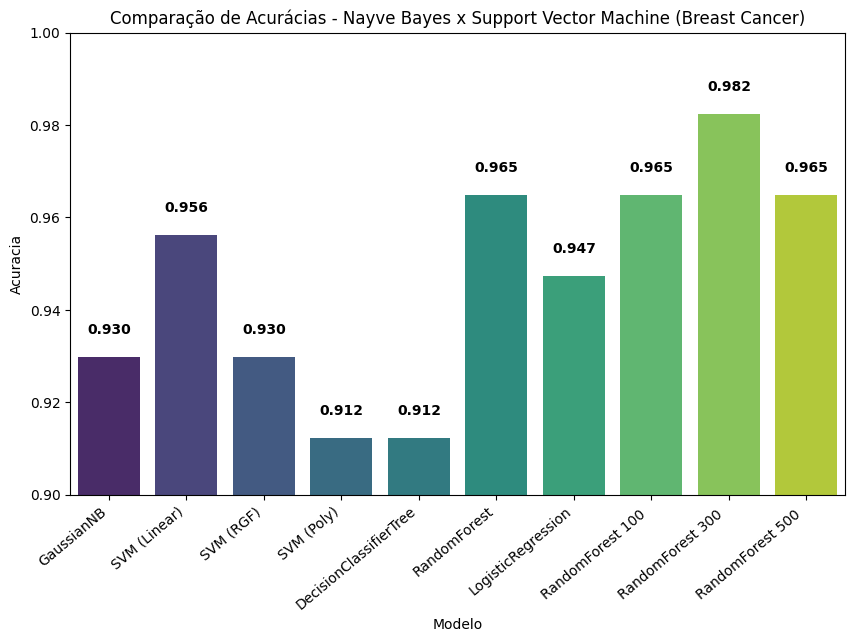

In [417]:
plt.figure(figsize=(10,6))
sns.barplot(
    data = df_resultados_,
    x = 'Modelo',
    y = 'Acuracia',
    hue = 'Modelo',
    palette = 'viridis',
    legend = False
)

plt.title('Comparação de Acurácias - Nayve Bayes x Support Vector Machine (Breast Cancer)')
for i, v in enumerate(df_resultados_['Acuracia']):
    plt.text(i,v + 0.005, f'{v:.3f}', ha = 'center', fontweight = 'bold')
plt.xticks(rotation = 40, ha = 'right')
plt.ylim(0.90,1.0)
##plt.subplots.adjust(bottom = 0.25)
plt.show()

# Regressão 

### Regressão não mede acurácia, os modelos de regressão usam como métrica a quantidade de erros

## Quanto maior r2_score melhor é o modelo, significa que ele consiguiu extrair melhor as informações.


In [418]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [419]:
california = fetch_california_housing(as_frame = True)
df_cal = california.frame

In [420]:
X_cal = df_cal.drop('MedHouseVal',axis =1 )
Y_cal = df_cal['MedHouseVal']

In [421]:
X_cal.shape, Y_cal.shape

((20640, 8), (20640,))

In [422]:
X_train_cal,X_test_cal, Y_train_cal,Y_test_cal = train_test_split(
    X_cal,Y_cal,
    test_size = 0.20,
    random_state = 0
)

# Regressão linear

In [423]:
lin_reg = LinearRegression()

In [424]:
lin_reg.fit(X_train_cal,Y_train_cal)

LinearRegression()

In [425]:
y_preds_reg = lin_reg.predict(X_test_cal)
mse_lin = mean_squared_error(Y_test_cal,y_preds_reg)
r2_lin = r2_score(Y_test_cal,y_preds_reg)

print('Regressão Linear')
print('MSE: ', mse_lin)
print('r2_score: ', r2_lin)

Regressão Linear
MSE:  0.5289841670367214
r2_score:  0.5943232652466199


## DecisionTreeRegressor 

In [426]:
dt_reg = DecisionTreeRegressor(random_state = 0 )
dt_reg.fit(X_train_cal, Y_train_cal)

DecisionTreeRegressor(random_state=0)

In [427]:
y_preds_dt = dt_reg.predict(X_test_cal)
mse_dt = mean_squared_error(Y_test_cal,y_preds_dt)
r2_dt = r2_score(Y_test_cal, y_preds_dt)

print('Árvore de Decisão')
print('MSE: ', mse_dt)
print('r2_score: ', r2_dt)

Árvore de Decisão
MSE:  0.5314522704255572
r2_score:  0.5924304824636766


## RandomForestRegressor

In [428]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state = 0)
rf_regressor.fit(X_train_cal, Y_train_cal)

RandomForestRegressor(random_state=0)

In [429]:
y_preds_rf = rf_regressor.predict(X_test_cal)
mse_rf = mean_squared_error(Y_test_cal,y_preds_rf)
r2_rf = r2_score(Y_test_cal, y_preds_rf)

print('Random Forest')
print('MSE: ', mse_rf)
print('r2_score: ', r2_rf)

Random Forest
MSE:  0.26340529577297467
r2_score:  0.7979950876327253


# Modelos de regressão 

In [430]:
modelos_rg = {
    'Linear Regression': LinearRegression(),
    'DecisionTreeRegression': DecisionTreeRegressor(random_state = 0 ),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state = 0),
}

# Resultados regressão

In [431]:
resultados_rg = {
    'Modelo': [],
    'Score': []
}

In [432]:
for nome_modelo, modelo in  modelos_rg.items():
    modelo.fit(X_train_cal,Y_train_cal)
    y_preds_regression = modelo.predict(X_test_cal)
    mse_regression = mean_squared_error(Y_test_cal,y_preds_regression)
    r2_score_regression = r2_score(Y_test_cal,y_preds_regression)
    resultados_rg['Modelo'].append(nome_modelo)
    resultados_rg['Score'].append(r2_score_regression)

    print(f'\n==== {nome_modelo} =====')
    print('MSE: ', mse_regression)
    print('r2_score: ', r2_score_regression)
    print('-' * 80)
    


==== Linear Regression =====
MSE:  0.5289841670367214
r2_score:  0.5943232652466199
--------------------------------------------------------------------------------

==== DecisionTreeRegression =====
MSE:  0.5314522704255572
r2_score:  0.5924304824636766
--------------------------------------------------------------------------------

==== RandomForestRegressor =====
MSE:  0.26340529577297467
r2_score:  0.7979950876327253
--------------------------------------------------------------------------------


# Dataframe regressão

In [433]:
df_resultados_rg =  pd.DataFrame(resultados_rg)

In [434]:
df_resultados_rg


,Modelo,Score
0,Linear Regression,0.594323
1,DecisionTreeRegression,0.592430
2,RandomForestRegressor,0.797995


In [435]:
df_resultados_rg.reset_index(drop = True, inplace = True)

In [437]:
df_resultados_rg

,Modelo,Score
0,Linear Regression,0.594323
1,DecisionTreeRegression,0.592430
2,RandomForestRegressor,0.797995


# Gráfico de modelos de regressão 

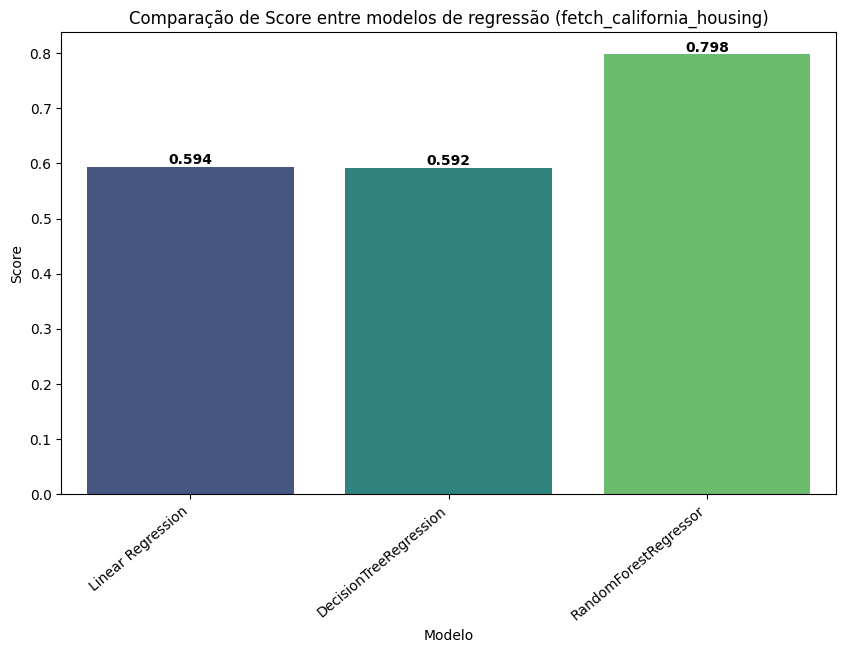

In [440]:
plt.figure(figsize=(10,6))
sns.barplot(
    data = df_resultados_rg,
    x = 'Modelo',
    y = 'Score',
    hue = 'Modelo',
    palette = 'viridis',
    legend = False
)

plt.title('Comparação de Score entre modelos de regressão (fetch_california_housing)')
for i, v in enumerate(df_resultados_rg['Score']):
    plt.text(i,v + 0.005, f'{v:.3f}', ha = 'center', fontweight = 'bold')
plt.xticks(rotation = 40, ha = 'right')
plt.show()
